<a href="https://colab.research.google.com/github/Kzzrll/HMM3/blob/main/DZ_10_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание по теме «Временные ряды, общая теория»**

Задание
Вопросы по заданию
Преподаватель: Даниил Корбут, Наталья Баданина, Иван Анисковец, Елена Харьковская, Павел Мехнин
Задание

Скачайте материалы к занятию.
Проанализируйте 6 временных рядов из папки Series и сделайте их стационарными:

monthly-sales-of-company-x-jan-6.csv

monthly-boston-armed-robberies-j.csv

international-airline-passengers.csv

mean-monthly-air-temperature-deg.csv

weekly-closings-of-the-dowjones-.csv

daily-total-female-births-in-cal.csv

Пришлите решение в виде ссылки на GitHub с ноутбуком.

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from scipy.stats import boxcox
%matplotlib inline

###Загрузите данные и ознакомьтесь с ними

In [2]:
from google.colab import drive
drive.mount('/content/drive/')
pm = r'/content/drive/My Drive/ML/ML_DZ/ML_DZ_10/'

Mounted at /content/drive/


In [3]:
f_1 = 'monthly-sales-of-company-x-jan-6.csv'
f_2 = 'monthly-boston-armed-robberies-j.csv'
f_3 = 'international-airline-passengers.csv'
f_4 = 'mean-monthly-air-temperature-deg.csv'
f_5 = 'weekly-closings-of-the-dowjones-.csv'
f_6 = 'daily-total-female-births-in-cal.csv'



In [4]:
df1 = pd.read_csv(f'{pm}{f_1}', sep = ',')
df2 = pd.read_csv(f'{pm}{f_2}', sep = ',')
df3 = pd.read_csv(f'{pm}{f_3}', sep = ',')
df4 = pd.read_csv(f'{pm}{f_4}', sep = ',')
df5 = pd.read_csv(f'{pm}{f_5}', sep = ',')
df6 = pd.read_csv(f'{pm}{f_6}', sep = ',')

# РЯД №1  monthly-sales-of-company-x-jan-6.csv

#

In [5]:
df1

,Month,Count
0,1965-01,154
1,1965-02,96
2,1965-03,73
3,1965-04,49
4,1965-05,36
...,...,...
72,1971-01,628
73,1971-02,308
74,1971-03,324
75,1971-04,248


In [6]:
# Преобразуем столбец Month в формат даты
df1['Month'] = pd.to_datetime(df1['Month'])

# Устанавливаем столбец Month как индекс
df1.set_index('Month', inplace=True)

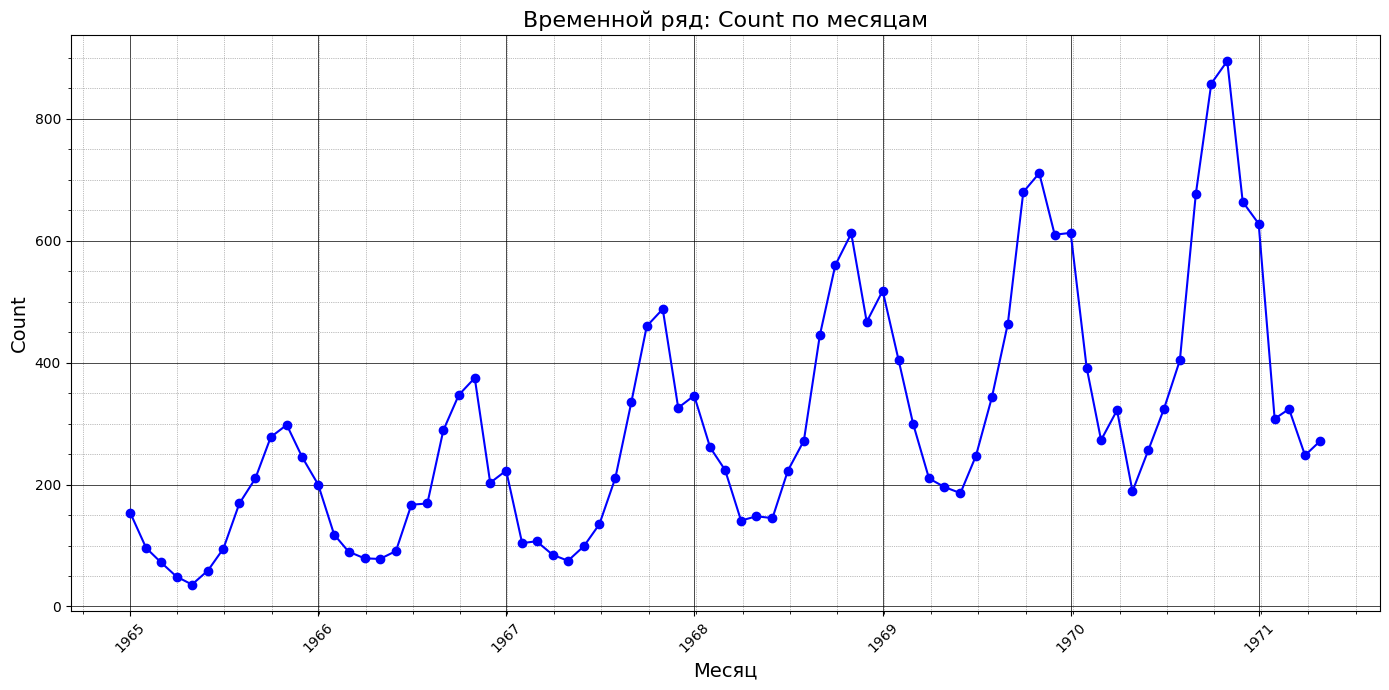

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Настройка визуализации
plt.figure(figsize=(14, 7))


# Построение графика
plt.plot(df1.index, df1['Count'], marker='o', linestyle='-', color='b')

# Оформление графика
plt.title('Временной ряд: Count по месяцам', fontsize=16)
plt.xlabel('Месяц', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Добавляем сетку и подписи
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')

# Показываем график
plt.show()


In [8]:
# стоит применить логарифмирование перед дифференцированием
df1['Log_Count'] = np.log(df1['Count'])
df1['Log_Differenced_Count'] = df1['Log_Count'].diff()

print(df1[['Count', 'Log_Count', 'Log_Differenced_Count']])

            Count  Log_Count  Log_Differenced_Count
Month                                              
1965-01-01    154   5.036953                    NaN
1965-02-01     96   4.564348              -0.472604
1965-03-01     73   4.290459              -0.273889
1965-04-01     49   3.891820              -0.398639
1965-05-01     36   3.583519              -0.308301
...           ...        ...                    ...
1971-01-01    628   6.442540              -0.055742
1971-02-01    308   5.730100              -0.712440
1971-03-01    324   5.780744               0.050644
1971-04-01    248   5.513429              -0.267315
1971-05-01    272   5.605802               0.092373

[77 rows x 3 columns]


In [9]:
from statsmodels.tsa.stattools import adfuller

# Выполняем тест Дики-Фуллера для исходного и преобразованного ряда
result_original = adfuller(df1['Count'])
result_differenced = adfuller(df1['Log_Differenced_Count'].dropna())

print("Тест Дики-Фуллера для исходного ряда:", result_original)
print("Тест Дики-Фуллера для дифференцированного ряда:", result_differenced)


Тест Дики-Фуллера для исходного ряда: (np.float64(0.6547150829524446), np.float64(0.9888894205170052), 12, 64, {'1%': np.float64(-3.53692771987915), '5%': np.float64(-2.907887369384766), '10%': np.float64(-2.591493291015625)}, np.float64(694.8691059449682))
Тест Дики-Фуллера для дифференцированного ряда: (np.float64(-3.135643801006635), np.float64(0.024025392839875176), 11, 64, {'1%': np.float64(-3.53692771987915), '5%': np.float64(-2.907887369384766), '10%': np.float64(-2.591493291015625)}, np.float64(-36.70644470560855))


In [10]:
# Представим в информативнов виде
# Создаём словарь с результатами
results = {
    'Тип ряда': ['Исходный ряд', 'Дифференцированный ряд'],
    'Статистика теста': [result_original[0], result_differenced[0]],
    'P-значение': [result_original[1], result_differenced[1]],
    'Количество использованных лагов': [result_original[2], result_differenced[2]],
    'Количество наблюдений': [result_original[3], result_differenced[3]],
    'Критические значения': [
        f"1%: {result_original[4]['1%']}, 5%: {result_original[4]['5%']}, 10%: {result_original[4]['10%']}",
        f"1%: {result_differenced[4]['1%']}, 5%: {result_differenced[4]['5%']}, 10%: {result_differenced[4]['10%']}"
    ]
}

# Создаём DataFrame
results_df = pd.DataFrame(results)

# Выводим таблицу
print(results_df)

                 Тип ряда  Статистика теста  P-значение  \
0            Исходный ряд          0.654715    0.988889   
1  Дифференцированный ряд         -3.135644    0.024025   

   Количество использованных лагов  Количество наблюдений  \
0                               12                     64   
1                               11                     64   

                                Критические значения  
0  1%: -3.53692771987915, 5%: -2.907887369384766,...  
1  1%: -3.53692771987915, 5%: -2.907887369384766,...  


**ВЫВОД:**

Исходный ряд нестационарен.
После логарифмирования и дифференцирования ряд становится стационарным.

 **Результаты теста Дики-Фуллера** после логарифмирования и дифференцирования позволяют сделать выводы о стационарности ряда.

1. **Для исходного ряда:**

**Статистика теста:** 0,6547.

**P-значение:** 0,9889.

**Критические значения:**

1 % уровень значимости: –3,5369;

5 % уровень значимости: –2,9079;

10 % уровень значимости: –2,5915.

**Выводы по исходному ряду:**

Статистика теста (0,6547) значительно выше всех критических значений.

P-значение (0,9889) гораздо больше 0,05.

Это означает, что **гипотеза о наличии единичного корня не отвергается**, и **ряд не является стационарным**. Исходный временной ряд имеет трендовую составляющую или другие нестационарные компоненты.

2. **Для дифференцированного ряда (после логарифмирования):**

**Статистика теста:** –3,1356.

**P-значение:** 0,0240.

**Критические значения:**

1 % уровень значимости: –3,5369;

5 % уровень значимости: –2,9079;

10 % уровень значимости: –2,5915.

**Выводы по дифференцированному ряду:**

Статистика теста (–3,1356) ниже критического значения для 5 % уровня значимости (–2,9079).

P-значение (0,0240) меньше 0,05.

Это указывает на то, что **гипотеза о наличии единичного корня отвергается на уровне значимости 5 %**, и **ряд можно считать стационарным**.



# РЯД №2  monthly-boston-armed-robberies-j.csv

In [11]:
df2

,Month,Count
0,1966-01,41
1,1966-02,39
2,1966-03,50
3,1966-04,40
4,1966-05,43
...,...,...
113,1975-06,316
114,1975-07,398
115,1975-08,394
116,1975-09,431


In [12]:
# Преобразуем столбец Month в формат даты
df2['Month'] = pd.to_datetime(df2['Month'])

# Устанавливаем столбец Month как индекс
df2.set_index('Month', inplace=True)

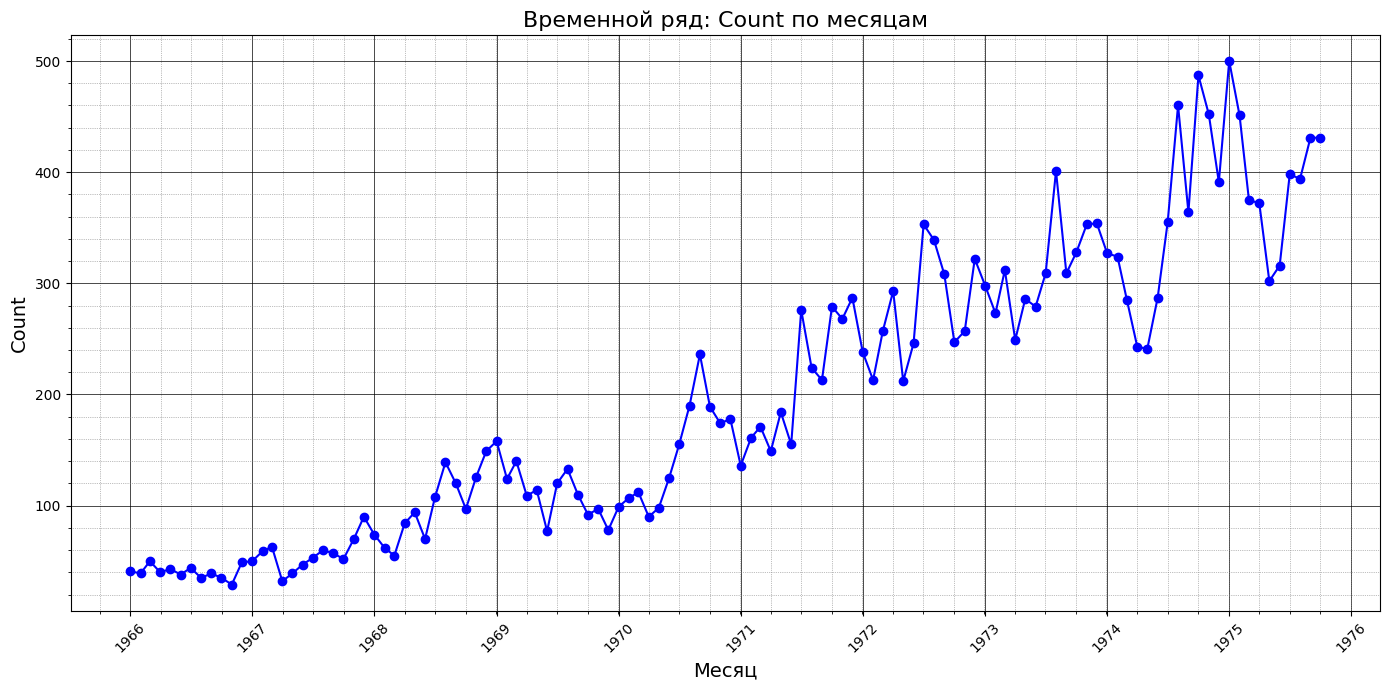

In [13]:
# Настройка визуализации
plt.figure(figsize=(14, 7))


# Построение графика
plt.plot(df2.index, df2['Count'], marker='o', linestyle='-', color='b')

# Оформление графика
plt.title('Временной ряд: Count по месяцам', fontsize=16)
plt.xlabel('Месяц', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Добавляем сетку и подписи
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')

# Показываем график
plt.show()

In [14]:
# стоит применить логарифмирование перед дифференцированием
df2['Log_Count'] = np.log(df2['Count'])
df2['Log_Differenced_Count'] = df2['Log_Count'].diff()

print(df2[['Count', 'Log_Count', 'Log_Differenced_Count']])

            Count  Log_Count  Log_Differenced_Count
Month                                              
1966-01-01     41   3.713572                    NaN
1966-02-01     39   3.663562              -0.050010
1966-03-01     50   3.912023               0.248461
1966-04-01     40   3.688879              -0.223144
1966-05-01     43   3.761200               0.072321
...           ...        ...                    ...
1975-06-01    316   5.755742               0.045315
1975-07-01    398   5.986452               0.230710
1975-08-01    394   5.976351              -0.010101
1975-09-01    431   6.066108               0.089757
1975-10-01    431   6.066108               0.000000

[118 rows x 3 columns]


In [15]:
from statsmodels.tsa.stattools import adfuller

# Выполняем тест Дики-Фуллера для исходного и преобразованного ряда
result_original2 = adfuller(df2['Count'])
result_differenced2 = adfuller(df2['Log_Differenced_Count'].dropna())

print("Тест Дики-Фуллера для исходного ряда:", result_original2)
print("Тест Дики-Фуллера для дифференцированного ряда:", result_differenced2)


Тест Дики-Фуллера для исходного ряда: (np.float64(1.001102140245781), np.float64(0.994277563805723), 11, 106, {'1%': np.float64(-3.4936021509366793), '5%': np.float64(-2.8892174239808703), '10%': np.float64(-2.58153320754717)}, np.float64(1051.4437803466026))
Тест Дики-Фуллера для дифференцированного ряда: (np.float64(-7.601792127269042), np.float64(2.3786024417437596e-11), 3, 113, {'1%': np.float64(-3.489589552580676), '5%': np.float64(-2.887477210140433), '10%': np.float64(-2.580604145195395)}, np.float64(-38.69170385061901))


In [16]:
# Представим в информативном виде
# Создаём словарь с результатами
results2 = {
    'Тип ряда': ['Исходный ряд', 'Дифференцированный ряд'],
    'Статистика теста': [result_original2[0], result_differenced2[0]],
    'P-значение': [result_original2[1], result_differenced2[1]],
    'Количество использованных лагов': [result_original2[2], result_differenced2[2]],
    'Количество наблюдений': [result_original2[3], result_differenced2[3]],
    'Критические значения': [
        f"1%: {result_original2[4]['1%']}, 5%: {result_original2[4]['5%']}, 10%: {result_original2[4]['10%']}",
        f"1%: {result_differenced2[4]['1%']}, 5%: {result_differenced2[4]['5%']}, 10%: {result_differenced2[4]['10%']}"
    ]
}

# Создаём DataFrame
results_df2 = pd.DataFrame(results2)

# Выводим таблицу
print(results_df2)

                 Тип ряда  Статистика теста    P-значение  \
0            Исходный ряд          1.001102  9.942776e-01   
1  Дифференцированный ряд         -7.601792  2.378602e-11   

   Количество использованных лагов  Количество наблюдений  \
0                               11                    106   
1                                3                    113   

                                Критические значения  
0  1%: -3.4936021509366793, 5%: -2.88921742398087...  
1  1%: -3.489589552580676, 5%: -2.887477210140433...  


**ВЫВОД**

1. Анализ исходного ряда:
- Статистика теста (1.0011) значительно выше всех критических значений.
- P-значение (0.9943) гораздо больше 0.05.
Это означает, что гипотеза о наличии единичного корня не отвергается, и ряд не является стационарным.

2. Анализ дифференцированного ряда:
- Статистика теста (-7.6018) меньше всех критических значений.
- P-значение (2.3786e-11) гораздо меньше 0.05.
Это означает, что гипотеза о наличии единичного корня отвергается, и ряд является стационарным.




# РЯД №3  international-airline-passengers.csv

In [17]:
df3

,Month,Count
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [18]:
# Преобразуем столбец Month в формат даты
df3['Month'] = pd.to_datetime(df3['Month'])

# Устанавливаем столбец Month как индекс
df3.set_index('Month', inplace=True)

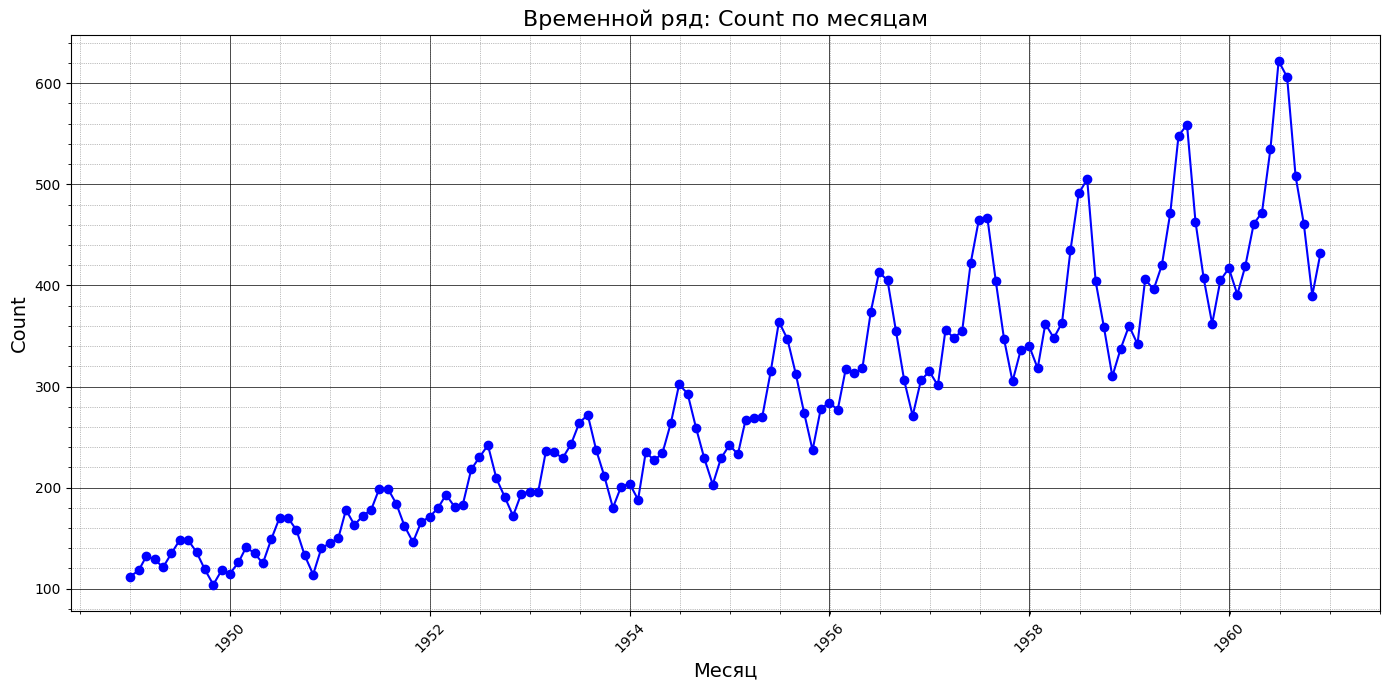

In [19]:
# Настройка визуализации
plt.figure(figsize=(14, 7))
# Построение графика
plt.plot(df3.index, df3['Count'], marker='o', linestyle='-', color='b')

# Оформление графика
plt.title('Временной ряд: Count по месяцам', fontsize=16)
plt.xlabel('Месяц', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Добавляем сетку и подписи
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')

# Показываем график
plt.show()

In [20]:
# стоит применить логарифмирование перед дифференцированием
df3['Log_Count'] = np.log(df3['Count'])
df3['Log_Differenced_Count'] = df3['Log_Count'].diff()

print(df3[['Count', 'Log_Count', 'Log_Differenced_Count']])

            Count  Log_Count  Log_Differenced_Count
Month                                              
1949-01-01    112   4.718499                    NaN
1949-02-01    118   4.770685               0.052186
1949-03-01    132   4.882802               0.112117
1949-04-01    129   4.859812              -0.022990
1949-05-01    121   4.795791              -0.064022
...           ...        ...                    ...
1960-08-01    606   6.406880              -0.026060
1960-09-01    508   6.230481              -0.176399
1960-10-01    461   6.133398              -0.097083
1960-11-01    390   5.966147              -0.167251
1960-12-01    432   6.068426               0.102279

[144 rows x 3 columns]


**Произведем очистку данных для получения стационарного ряда** (в случаях других представленных рядов данную процедуру можно не выполнять с учетом решения поставленной задачи).

In [21]:
# Шаг 1: Проверка на пропуски
print("Проверка на пропуски:")
print(df3.isnull().sum())

Проверка на пропуски:
Count                    0
Log_Count                0
Log_Differenced_Count    1
dtype: int64


In [22]:
# Шаг 2: Проверка типов данных
print("\nТипы данных:")
print(df3.dtypes)


Типы данных:
Count                      int64
Log_Count                float64
Log_Differenced_Count    float64
dtype: object


In [23]:
# Шаг 3: Обработка пропусков (если есть)
# Заполнение пропусков  средним значением
df3['Log_Differenced_Count'].fillna(df3['Log_Differenced_Count'].mean(), inplace=True)

/tmp/ipython-input-2241911536.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df3['Log_Differenced_Count'].fillna(df3['Log_Differenced_Count'].mean(), inplace=True)


In [24]:
# Шаг 4: Проверка на дубликаты
duplicates = df3.duplicated().sum()
print(f"\nКоличество дубликатов: {duplicates}")


Количество дубликатов: 0


In [25]:
# Шаг 5: Обработка аномалий в action_value
# Удаление отрицательных значений
df3 = df3[df3['Log_Differenced_Count'] >= 0]

In [26]:
# Шаг 6: Проверка на выбросы
# Для action_value используем IQR метод
Q31 = df3['Log_Differenced_Count'].quantile(0.25)
Q33 = df3['Log_Differenced_Count'].quantile(0.75)
IQR3 = Q33 - Q31

In [27]:
# Определяем границы
lower_bound = Q31 - 1.5 * IQR3
upper_bound = Q33 + 1.5 * IQR3

In [28]:
# Фильтруем выбросы
df3 = df3[(df3['Log_Differenced_Count'] >= lower_bound) & (df3['Log_Differenced_Count'] <= upper_bound)]


In [29]:
# Шаг 8: Проверка результата
print("\nРезультат очистки данных:")
print(df3.head())
print("\nСтатистика после очистки:")
print(df3.describe())



Результат очистки данных:
            Count  Log_Count  Log_Differenced_Count
Month                                              
1949-01-01    112   4.718499               0.009440
1949-02-01    118   4.770685               0.052186
1949-03-01    132   4.882802               0.112117
1949-06-01    135   4.905275               0.109484
1949-07-01    148   4.997212               0.091937

Статистика после очистки:
            Count  Log_Count  Log_Differenced_Count
count   83.000000  83.000000              83.000000
mean   288.855422   5.571319               0.086280
std    125.071310   0.443127               0.059379
min    112.000000   4.718499               0.000000
25%    181.500000   5.201222               0.029764
50%    267.000000   5.587249               0.091937
75%    369.000000   5.910705               0.128987
max    622.000000   6.432940               0.223144


In [30]:
from statsmodels.tsa.stattools import adfuller

# Выполняем тест Дики-Фуллера для исходного и преобразованного ряда
result_original3 = adfuller(df3['Count'])
result_differenced3 = adfuller(df3['Log_Differenced_Count'].dropna())

print("Тест Дики-Фуллера для исходного ряда:", result_original3)
print("Тест Дики-Фуллера для дифференцированного ряда:", result_differenced3)


Тест Дики-Фуллера для исходного ряда: (np.float64(1.228817188999543), np.float64(0.9961790588497814), 6, 76, {'1%': np.float64(-3.5194805351545413), '5%': np.float64(-2.9003945086747343), '10%': np.float64(-2.5874984279778395)}, np.float64(678.3528463933185))
Тест Дики-Фуллера для дифференцированного ряда: (np.float64(-13.419970824635131), np.float64(4.208580356470855e-25), 0, 82, {'1%': np.float64(-3.512738056978279), '5%': np.float64(-2.8974898650628984), '10%': np.float64(-2.585948732897085)}, np.float64(-207.31825944333252))


In [31]:
# Представим в информативнов виде
# Создаём словарь с результатами
results3 = {
    'Тип ряда': ['Исходный ряд', 'Дифференцированный ряд'],
    'Статистика теста': [result_original3[0], result_differenced3[0]],
    'P-значение': [result_original3[1], result_differenced3[1]],
    'Количество использованных лагов': [result_original3[2], result_differenced3[2]],
    'Количество наблюдений': [result_original3[3], result_differenced3[3]],
    'Критические значения': [
        f"1%: {result_original3[4]['1%']}, 5%: {result_original3[4]['5%']}, 10%: {result_original3[4]['10%']}",
        f"1%: {result_differenced3[4]['1%']}, 5%: {result_differenced3[4]['5%']}, 10%: {result_differenced3[4]['10%']}"
    ]
}

# Создаём DataFrame
results_df3 = pd.DataFrame(results3)

# Выводим таблицу
print(results_df3)

                 Тип ряда  Статистика теста    P-значение  \
0            Исходный ряд          1.228817  9.961791e-01   
1  Дифференцированный ряд        -13.419971  4.208580e-25   

   Количество использованных лагов  Количество наблюдений  \
0                                6                     76   
1                                0                     82   

                                Критические значения  
0  1%: -3.5194805351545413, 5%: -2.90039450867473...  
1  1%: -3.512738056978279, 5%: -2.897489865062898...  


**ВЫВОД**

1.Анализ исходного ряда (нестационарного).

Статистика теста (1,228817) существенно выше критического значения при 5 % уровне значимости (-2,9004).

P- значение (0,996) намного превышает порог значимости 0,05.

2.Анализ дифференцированного ряда (стационарного).

Статистика теста (-13,419971) значительно ниже критического значения при 5 % уровне значимости (-2,8975).

P-значение (4.208580e-25  < 0,005) позволяет отвергнуть нулевую гипотезу о нестационарности с высокой степенью уверенности.


# РЯД №4  mean-monthly-air-temperature-deg.csv

In [32]:
df4

,Month,Deg
0,1920-01,40.6
1,1920-02,40.8
2,1920-03,44.4
3,1920-04,46.7
4,1920-05,54.1
...,...,...
235,1939-08,61.8
236,1939-09,58.2
237,1939-10,46.7
238,1939-11,46.6


In [33]:
# Преобразуем столбец Month в формат даты
df4['Month'] = pd.to_datetime(df4['Month'])

# Устанавливаем столбец Month как индекс
df4.set_index('Month', inplace=True)

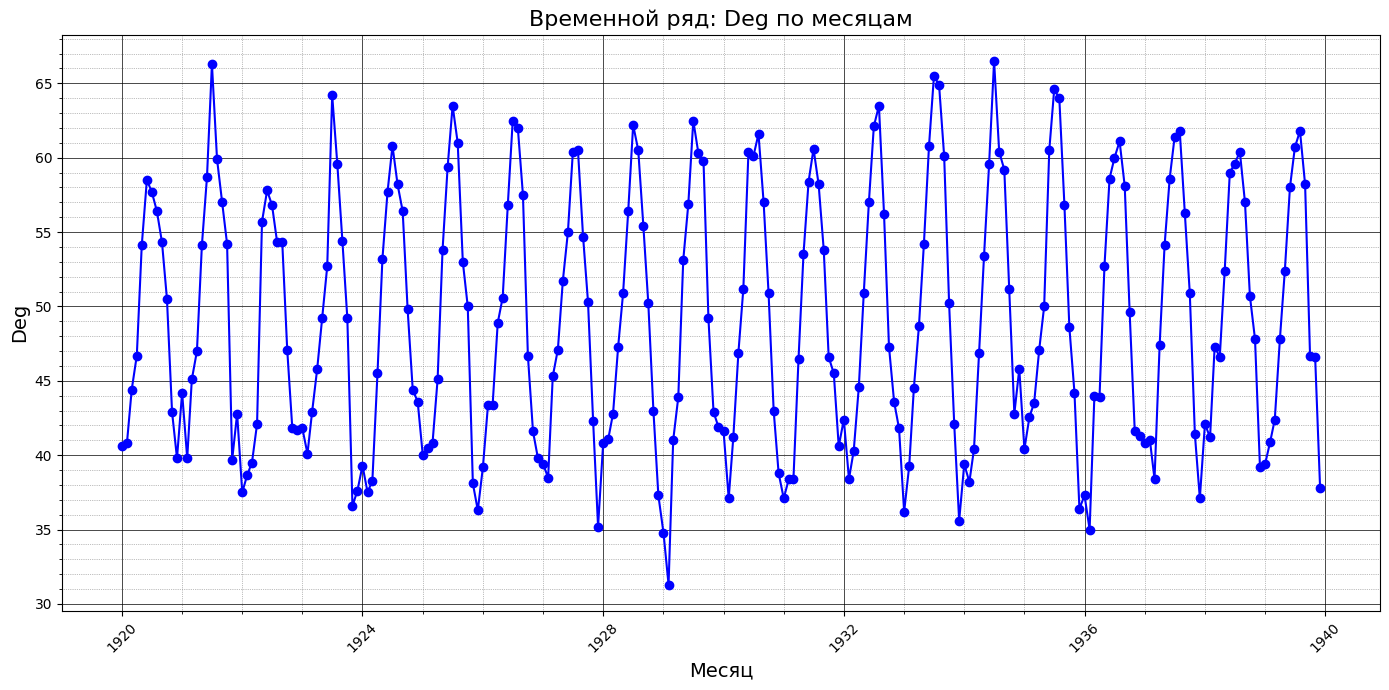

In [34]:
# Настройка визуализации
plt.figure(figsize=(14, 7))
# Построение графика
plt.plot(df4.index, df4['Deg'], marker='o', linestyle='-', color='b')
# Оформление графика
plt.title('Временной ряд: Deg по месяцам', fontsize=16)
plt.xlabel('Месяц', fontsize=14)
plt.ylabel('Deg', fontsize=14)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Добавляем сетку и подписи
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')

# Показываем график
plt.show()

In [35]:
# стоит применить логарифмирование перед дифференцированием
df4['Log_Count'] = np.log(df4['Deg'])
df4['Log_Differenced_Count'] = df4['Log_Count'].diff()

print(df3[['Count', 'Log_Count', 'Log_Differenced_Count']])

            Count  Log_Count  Log_Differenced_Count
Month                                              
1949-01-01    112   4.718499               0.009440
1949-02-01    118   4.770685               0.052186
1949-03-01    132   4.882802               0.112117
1949-06-01    135   4.905275               0.109484
1949-07-01    148   4.997212               0.091937
...           ...        ...                    ...
1960-04-01    461   6.133398               0.095527
1960-05-01    472   6.156979               0.023581
1960-06-01    535   6.282267               0.125288
1960-07-01    622   6.432940               0.150673
1960-12-01    432   6.068426               0.102279

[83 rows x 3 columns]


In [36]:
from statsmodels.tsa.stattools import adfuller

# Выполняем тест Дики-Фуллера для исходного и преобразованного ряда
result_original4 = adfuller(df4['Deg'])
result_differenced4 = adfuller(df4['Log_Differenced_Count'].dropna())

print("Тест Дики-Фуллера для исходного ряда:", result_original3)
print("Тест Дики-Фуллера для дифференцированного ряда:", result_differenced3)


Тест Дики-Фуллера для исходного ряда: (np.float64(1.228817188999543), np.float64(0.9961790588497814), 6, 76, {'1%': np.float64(-3.5194805351545413), '5%': np.float64(-2.9003945086747343), '10%': np.float64(-2.5874984279778395)}, np.float64(678.3528463933185))
Тест Дики-Фуллера для дифференцированного ряда: (np.float64(-13.419970824635131), np.float64(4.208580356470855e-25), 0, 82, {'1%': np.float64(-3.512738056978279), '5%': np.float64(-2.8974898650628984), '10%': np.float64(-2.585948732897085)}, np.float64(-207.31825944333252))


In [37]:
# Представим в информативном виде
# Создаём словарь с результатами
results4 = {
    'Тип ряда': ['Исходный ряд', 'Дифференцированный ряд'],
    'Статистика теста': [result_original4[0], result_differenced4[0]],
    'P-значение': [result_original4[1], result_differenced4[1]],
    'Количество использованных лагов': [result_original3[2], result_differenced3[2]],
    'Количество наблюдений': [result_original4[3], result_differenced4[3]],
    'Критические значения': [
        f"1%: {result_original4[4]['1%']}, 5%: {result_original4[4]['5%']}, 10%: {result_original4[4]['10%']}",
        f"1%: {result_differenced4[4]['1%']}, 5%: {result_differenced4[4]['5%']}, 10%: {result_differenced4[4]['10%']}"
    ]
}

# Создаём DataFrame
results_df4 = pd.DataFrame(results2)

# Выводим таблицу
print(results_df4)

                 Тип ряда  Статистика теста    P-значение  \
0            Исходный ряд          1.001102  9.942776e-01   
1  Дифференцированный ряд         -7.601792  2.378602e-11   

   Количество использованных лагов  Количество наблюдений  \
0                               11                    106   
1                                3                    113   

                                Критические значения  
0  1%: -3.4936021509366793, 5%: -2.88921742398087...  
1  1%: -3.489589552580676, 5%: -2.887477210140433...  


**ВЫВОД**

1.Анализ исходного ряда (нестационарного).

Значение статистики теста (1,001102) существенно превышает критическое значение при 5% уровне значимости (-2,8892).

P- значение (0,994) намного превышает порог значимости 0,05.

2.Анализ дифференцированного ряда (стационарного).

Статистика теста (-7,601792) значительно ниже критического значения при 5% уровне значимости (-2,8875).

P-значение ( 2.378602e-11 < 0,005) позволяет отвергнуть нулевую гипотезу о нестационарности с высокой степенью уверенности.

# РЯД №5  weekly-closings-of-the-dowjones-.csv

In [38]:
df5

,Week,Close
0,1971-W27,890.19
1,1971-W28,901.80
2,1971-W29,888.51
3,1971-W30,887.78
4,1971-W31,858.43
...,...,...
157,1974-W28,791.77
158,1974-W29,787.23
159,1974-W30,787.94
160,1974-W31,784.57


In [39]:
def week_to_datetime(week_str):
    year, week = week_str.split('-W')
    # Предполагаем, что неделя начинается с понедельника (день 1)
    return pd.to_datetime(f"{year}-W{week}-1", format="%Y-W%W-%w")

df5['Week'] = df5['Week'].apply(week_to_datetime)
df5.set_index('Week', inplace=True)

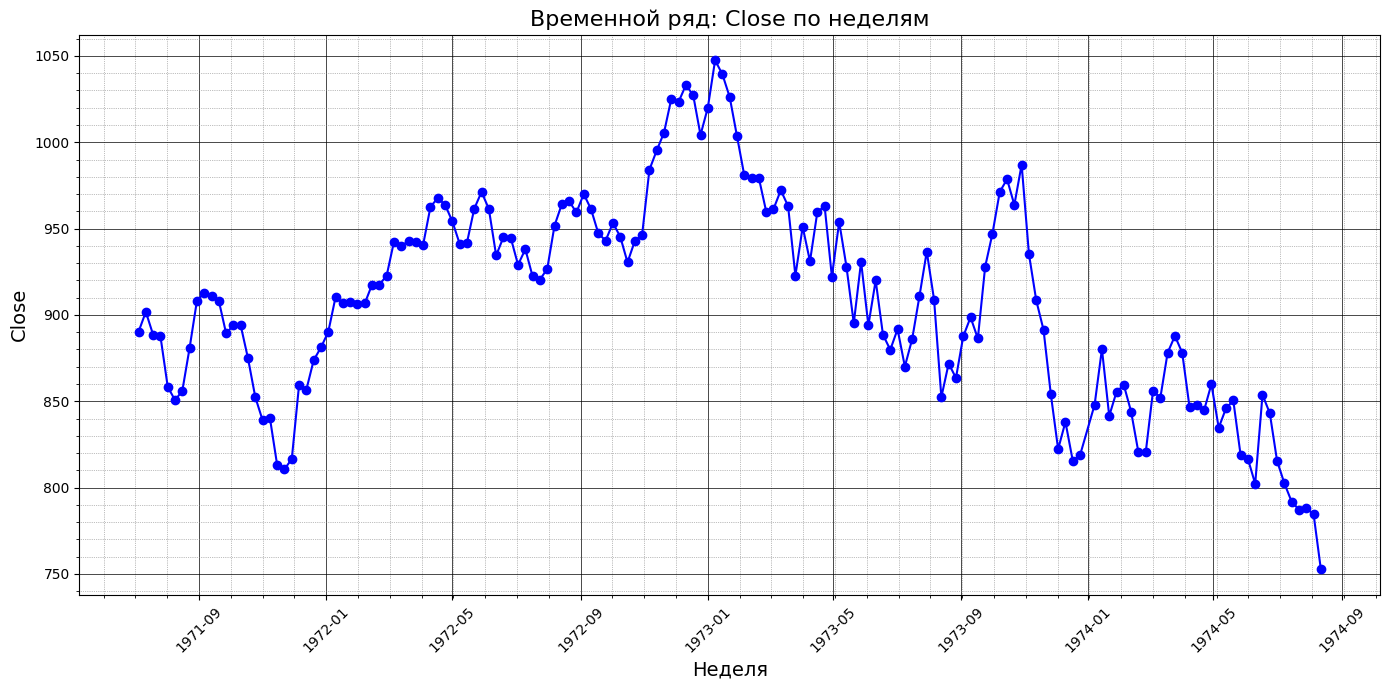

In [40]:
# Настройка визуализации
plt.figure(figsize=(14, 7))
# Построение графика
plt.plot(df5.index, df5['Close'], marker='o', linestyle='-', color='b')
# Оформление графика
plt.title('Временной ряд: Close по неделям', fontsize=16)
plt.xlabel('Неделя', fontsize=14)
plt.ylabel('Close', fontsize=14)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Добавляем сетку и подписи
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')

# Показываем график
plt.show()

In [41]:
# стоит применить логарифмирование перед дифференцированием
df5['Log_Count'] = np.log(df5['Close'])
df5['Log_Differenced_Count'] = df5['Log_Count'].diff()

print(df5[['Close', 'Log_Count', 'Log_Differenced_Count']])

             Close  Log_Count  Log_Differenced_Count
Week                                                
1971-07-05  890.19   6.791435                    NaN
1971-07-12  901.80   6.804393               0.012958
1971-07-19  888.51   6.789546              -0.014847
1971-07-26  887.78   6.788724              -0.000822
1971-08-02  858.43   6.755105              -0.033619
...            ...        ...                    ...
1974-07-15  791.77   6.674271              -0.013349
1974-07-22  787.23   6.668520              -0.005750
1974-07-29  787.94   6.669422               0.000901
1974-08-05  784.57   6.665136              -0.004286
1974-08-12  752.58   6.623507              -0.041628

[162 rows x 3 columns]


In [42]:
from statsmodels.tsa.stattools import adfuller

# Выполняем тест Дики-Фуллера для исходного и преобразованного ряда
result_original5 = adfuller(df5['Close'])
result_differenced5 = adfuller(df5['Log_Differenced_Count'].dropna())

print("Тест Дики-Фуллера для исходного ряда:", result_original5)
print("Тест Дики-Фуллера для дифференцированного ряда:", result_differenced5)


Тест Дики-Фуллера для исходного ряда: (np.float64(-1.3146254984911683), np.float64(0.6224548515589733), 0, 161, {'1%': np.float64(-3.471633386932248), '5%': np.float64(-2.8796651107461972), '10%': np.float64(-2.576433647235832)}, np.float64(1303.5058705610606))
Тест Дики-Фуллера для дифференцированного ряда: (np.float64(-12.995820716080098), np.float64(2.7516091322913448e-24), 0, 160, {'1%': np.float64(-3.4718957209472654), '5%': np.float64(-2.8797795410156253), '10%': np.float64(-2.5764947265625)}, np.float64(-689.2484820463599))


In [43]:
# Представим в информативнов виде
# Создаём словарь с результатами
results5 = {
    'Тип ряда': ['Исходный ряд', 'Дифференцированный ряд'],
    'Статистика теста': [result_original5[0], result_differenced5[0]],
    'P-значение': [result_original5[1], result_differenced5[1]],
    'Количество использованных лагов': [result_original5[2], result_differenced5[2]],
    'Количество наблюдений': [result_original5[3], result_differenced5[3]],
    'Критические значения': [
        f"1%: {result_original5[4]['1%']}, 5%: {result_original5[4]['5%']}, 10%: {result_original5[4]['10%']}",
        f"1%: {result_differenced5[4]['1%']}, 5%: {result_differenced5[4]['5%']}, 10%: {result_differenced5[4]['10%']}"
    ]
}

# Создаём DataFrame
results_df5 = pd.DataFrame(results5)

# Выводим таблицу
print(results_df5)

                 Тип ряда  Статистика теста    P-значение  \
0            Исходный ряд         -1.314625  6.224549e-01   
1  Дифференцированный ряд        -12.995821  2.751609e-24   

   Количество использованных лагов  Количество наблюдений  \
0                                0                    161   
1                                0                    160   

                                Критические значения  
0  1%: -3.471633386932248, 5%: -2.879665110746197...  
1  1%: -3.4718957209472654, 5%: -2.87977954101562...  


**ВЫВОД**

1.Анализ исходного ряда (нестационарного).

Значение статистики теста (-1,314625) выше критических значений (-3,471633 и -2,879665).

P-значение (0,622) существенно больше 0,05. Это означает, что нулевая гипотеза о наличии единичного корня не отвергается, и исходный ряд не является стационарным.

2.Анализ дифференцированного ряда (стационарного).

Значение статистики теста (-12,995821) значительно ниже критических значений.

P-значение (2,751609e-24) существенно меньше 0,05. Это означает, что нулевая гипотеза о наличии единичного корня отвергается, и дифференцированный ряд является стационарным.

# РЯД №6 daily-total-female-births-in-cal.csv

In [44]:
df6

,Date,Count
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44
...,...,...
360,1959-12-27,37
361,1959-12-28,52
362,1959-12-29,48
363,1959-12-30,55


In [45]:
# Преобразуем столбец Month в формат даты
df6['Date'] = pd.to_datetime(df6['Date'])

# Устанавливаем столбец Month как индекс
df6.set_index('Date', inplace=True)

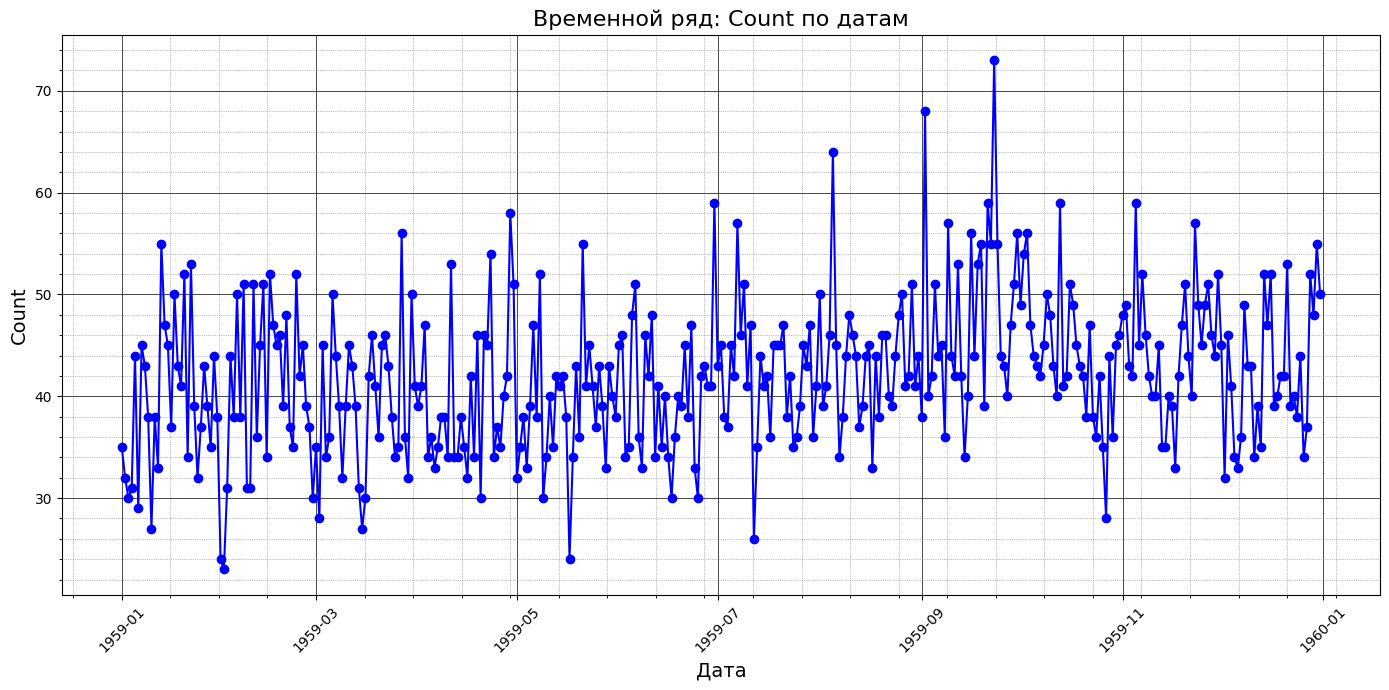

In [46]:
# Настройка визуализации
plt.figure(figsize=(14, 7))


# Построение графика
plt.plot(df6.index, df6['Count'], marker='o', linestyle='-', color='b')

# Оформление графика
plt.title('Временной ряд: Count по датам', fontsize=16)
plt.xlabel('Дата', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Добавляем сетку и подписи
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')

# Показываем график
plt.show()

In [47]:
# стоит применить логарифмирование перед дифференцированием
df6['Log_Count'] = np.log(df6['Count'])
df6['Log_Differenced_Count'] = df6['Log_Count'].diff()

print(df6[['Count', 'Log_Count', 'Log_Differenced_Count']])

            Count  Log_Count  Log_Differenced_Count
Date                                               
1959-01-01     35   3.555348                    NaN
1959-01-02     32   3.465736              -0.089612
1959-01-03     30   3.401197              -0.064539
1959-01-04     31   3.433987               0.032790
1959-01-05     44   3.784190               0.350202
...           ...        ...                    ...
1959-12-27     37   3.610918               0.084557
1959-12-28     52   3.951244               0.340326
1959-12-29     48   3.871201              -0.080043
1959-12-30     55   4.007333               0.136132
1959-12-31     50   3.912023              -0.095310

[365 rows x 3 columns]


In [48]:
from statsmodels.tsa.stattools import adfuller

# Выполняем тест Дики-Фуллера для исходного и преобразованного ряда
result_original6 = adfuller(df6['Count'])
result_differenced6 = adfuller(df6['Log_Differenced_Count'].dropna())

print("Тест Дики-Фуллера для исходного ряда:", result_original6)
print("Тест Дики-Фуллера для дифференцированного ряда:", result_differenced6)


Тест Дики-Фуллера для исходного ряда: (np.float64(-4.808291253559765), np.float64(5.2434129901498554e-05), 6, 358, {'1%': np.float64(-3.448748905151901), '5%': np.float64(-2.8696473721448728), '10%': np.float64(-2.5710891239349585)}, np.float64(2343.8290926464197))
Тест Дики-Фуллера для дифференцированного ряда: (np.float64(-12.963338685753918), np.float64(3.191204585878006e-24), 6, 357, {'1%': np.float64(-3.44880082033912), '5%': np.float64(-2.869670179576637), '10%': np.float64(-2.5711012838861036)}, np.float64(-232.34247802711457))


In [49]:
# Представим в информативном виде
# Создаём словарь с результатами
results6 = {
    'Тип ряда': ['Исходный ряд', 'Дифференцированный ряд'],
    'Статистика теста': [result_original6[0], result_differenced6[0]],
    'P-значение': [result_original6[1], result_differenced6[1]],
    'Количество использованных лагов': [result_original6[2], result_differenced6[2]],
    'Количество наблюдений': [result_original6[3], result_differenced6[3]],
    'Критические значения': [
        f"1%: {result_original6[4]['1%']}, 5%: {result_original6[4]['5%']}, 10%: {result_original6[4]['10%']}",
        f"1%: {result_differenced6[4]['1%']}, 5%: {result_differenced6[4]['5%']}, 10%: {result_differenced6[4]['10%']}"
    ]
}

# Создаём DataFrame
results_df6 = pd.DataFrame(results6)

# Выводим таблицу
print(results_df6)

                 Тип ряда  Статистика теста    P-значение  \
0            Исходный ряд         -4.808291  5.243413e-05   
1  Дифференцированный ряд        -12.963339  3.191205e-24   

   Количество использованных лагов  Количество наблюдений  \
0                                6                    358   
1                                6                    357   

                                Критические значения  
0  1%: -3.448748905151901, 5%: -2.869647372144872...  
1  1%: -3.44880082033912, 5%: -2.869670179576637,...  


**ВЫВОД**

1.Анализ исходного ряда (стационарного).

Для исходного ряда статистика теста (-4,808291) значительно ниже критических значений, а p-значение (5,243413e-05) меньше 0,05.

Это означает, что нулевая гипотеза о наличии единичного корня отвергается, и ряд является **стационарным**.


2.Анализ дифференцированного ряда (стационарного).

Для дифференцированного ряда статистика теста (-12,963339) также значительно ниже критических значений, а p-значение (3,191205e-24) ещё меньше.

Это подтверждает, что дифференцированный ряд стационарен.

Процедуру дифференцирования можно было не выполнять. **Исходный ряд является стационарным.**